In [50]:
import sys, os, distutils.core
sys.path.insert(0, os.path.abspath('../../../detectron2'))
sys.path.insert(0, os.path.abspath('../../../'))
sys.path.insert(0, os.path.abspath('.'))
os.environ['DETECTRON2_DATASETS'] = '/home/liwa/data/datasets/'

In [4]:
from detectron2.data import DatasetCatalog, MetadataCatalog
# from oneformer.data.datasets.register_yeast_panoptic_annos_semseg import register_all_yeast_panoptic_annos_sem_seg
from configs.yeast_panoptics.cityscapes_panoptic import register_all_yeastcity_panoptic

In [3]:
config_path = os.path.abspath("./configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_poly_200k_bs64_crop_640_640_yeast.yaml")

In [4]:
!python train_net_yeast.py --dist-url 'tcp://127.0.0.1:50164' \
--config-file $config_path \
--num-gpus 4

Command Line Args: Namespace(config_file='/home/liwa/project/OneFormer/detectron2/projects/Panoptic-DeepLab/configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_poly_200k_bs64_crop_640_640_yeast.yaml', dist_url='tcp://127.0.0.1:50164', eval_only=False, machine_rank=0, num_gpus=4, num_machines=1, opts=[], resume=False)
Loading config /home/liwa/project/OneFormer/detectron2/projects/Panoptic-DeepLab/configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_poly_200k_bs64_crop_640_640_yeast.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
Loading config /home/liwa/project/OneFormer/detectron2/projects/Panoptic-DeepLab/configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_poly_200k_bs64_crop_640_640_yeast.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
Loading config /home/liwa/project/OneFormer/detectron2/projects/Panoptic-DeepLab/configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_po

In [30]:
from detectron2.config import get_cfg
from detectron2.projects.panoptic_deeplab import (
    PanopticDeeplabDatasetMapper,
    add_panoptic_deeplab_config,
)
from detectron2.engine import default_setup
from detectron2.engine import DefaultPredictor
from google.colab.patches import cv2_imshow
import os, json, cv2, random
from detectron2.utils.visualizer import Visualizer

In [31]:
def setup(config_file):
    """
    Create configs and perform basic setups.
    """
    cfg = get_cfg()
    add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(config_file)
    # cfg.merge_from_list(args.opts)
    # cfg.freeze()
    # default_setup(cfg, args)
    return cfg

In [32]:
cfg = setup(config_path)

Loading config /home/liwa/project/OneFormer/detectron2/projects/Panoptic-DeepLab/configs/yeast_panoptics/panoptic_deeplab_R_52_os16_mg124_poly_200k_bs64_crop_640_640_yeast.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [33]:
cfg = get_cfg()
add_panoptic_deeplab_config(cfg)
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("./output/config.yaml")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = os.path.abspath("./output/model_0014999.pth")

In [34]:
predictor = DefaultPredictor(cfg)

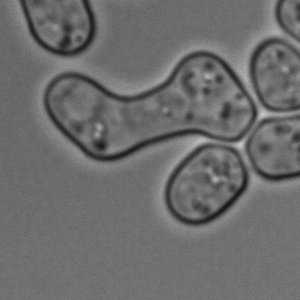

In [35]:
im = cv2.imread("/home/liwa/data/datasets/yeast/train2024/001_0_100/00001.png")[100:400,100:400]
cv2_imshow(im)

In [36]:
outputs = predictor(im)

/home/liwa/miniconda3/envs/oneformer/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


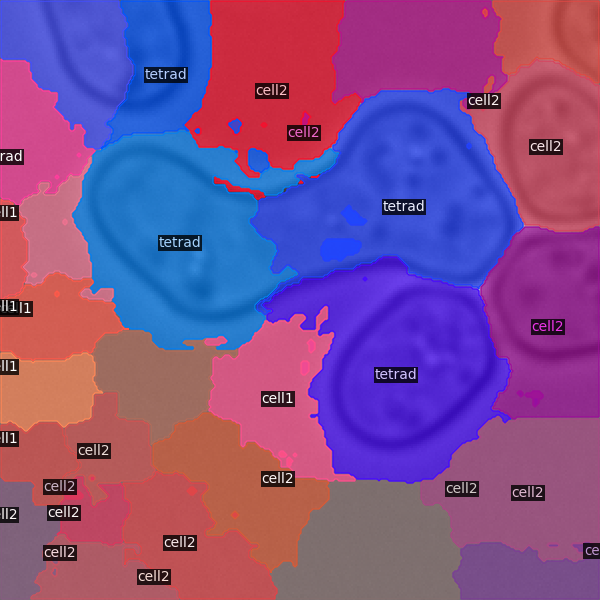

In [37]:
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

In [38]:
out = predictor(im)

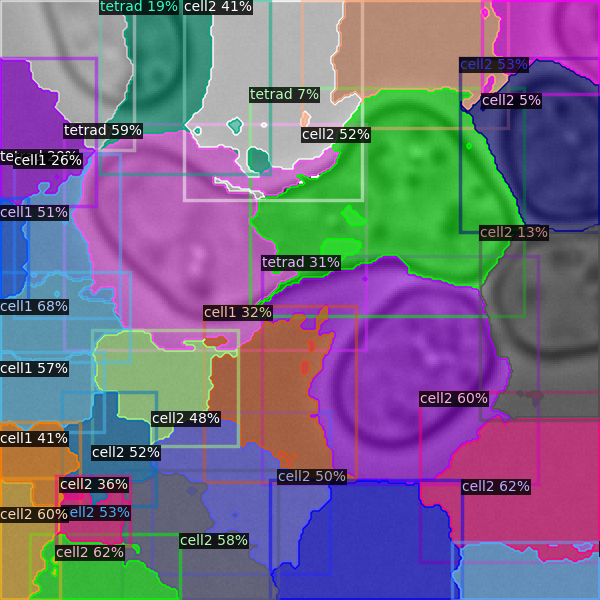

In [39]:
instances = predictor(im)["instances"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=2)
out = v.draw_instance_predictions(instances.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

In [5]:
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer

In [6]:
DatasetCatalog

DatasetCatalog(registered datasets: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fi

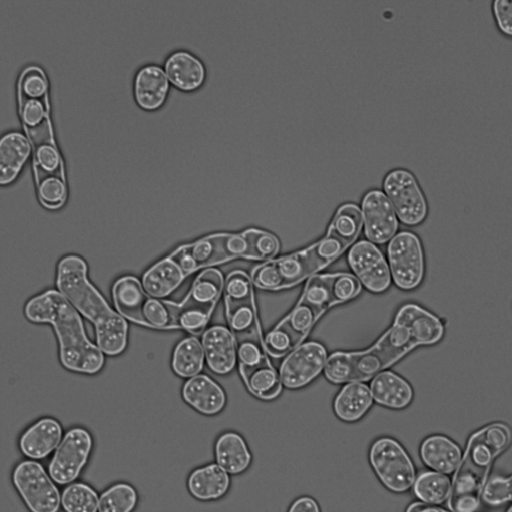

In [13]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("yeastcity_train")
metadata = MetadataCatalog.get("yeastcity_train")
for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

In [51]:
import sys, os, distutils.core
sys.path.insert(0, os.path.abspath('../../../detectron2'))
sys.path.insert(0, os.path.abspath('../../../'))
sys.path.insert(0, os.path.abspath('.'))
os.environ['DETECTRON2_DATASETS'] = '/home/liwa/data/datasets/'
from detectron2.data import DatasetCatalog, MetadataCatalog
from oneformer.data.datasets.register_yeast_panoptic_annos_semseg import register_all_yeast_panoptic_annos_sem_seg
from configs.yeast_panoptics.cityscapes_panoptic import register_all_yeastcity_panoptic
from detectron2.config import get_cfg
from detectron2.projects.panoptic_deeplab import (
    PanopticDeeplabDatasetMapper,
    add_panoptic_deeplab_config,
)
import detectron2.data.transforms as T
from detectron2.data import MetadataCatalog, build_detection_train_loader
import numpy as np
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
cfg = get_cfg()
add_panoptic_deeplab_config(cfg)
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library

cfg.merge_from_file("./output_0810_100datasets/config.yaml")
# cfg.DATASETS.TRAIN = ("yeastcity_train",)
# cfg.DATASETS.TEST = ("yeastcity_train",)
dataset_dicts = DatasetCatalog.get(cfg.DATASETS.TRAIN[0])
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

In [61]:
def build_sem_seg_train_aug(cfg):
    augs = [
        T.ResizeShortestEdge(
            [int(x * 0.1 * 512) for x in range(5, 41)],
            2048,
            cfg.INPUT.MIN_SIZE_TRAIN_SAMPLING,
        )
    ]
    # if cfg.INPUT.CROP.ENABLED:
    #     augs.append(T.RandomCrop(cfg.INPUT.CROP.TYPE, cfg.INPUT.CROP.SIZE))
    augs.append(T.RandomFlip())
    augs.append(T.RandomBrightness(intensity_min=0.5, intensity_max=1.5))
    augs.append(T.RandomContrast(intensity_min=0.5, intensity_max=1.5))
    return augs
cfg.INPUT.CROP.ENABLED = False

In [62]:
mapper = PanopticDeeplabDatasetMapper(cfg, augmentations=build_sem_seg_train_aug(cfg))
data_loader = build_detection_train_loader(cfg, mapper=mapper)

In [63]:
data_iter = iter(data_loader)
first_batch = next(data_iter)

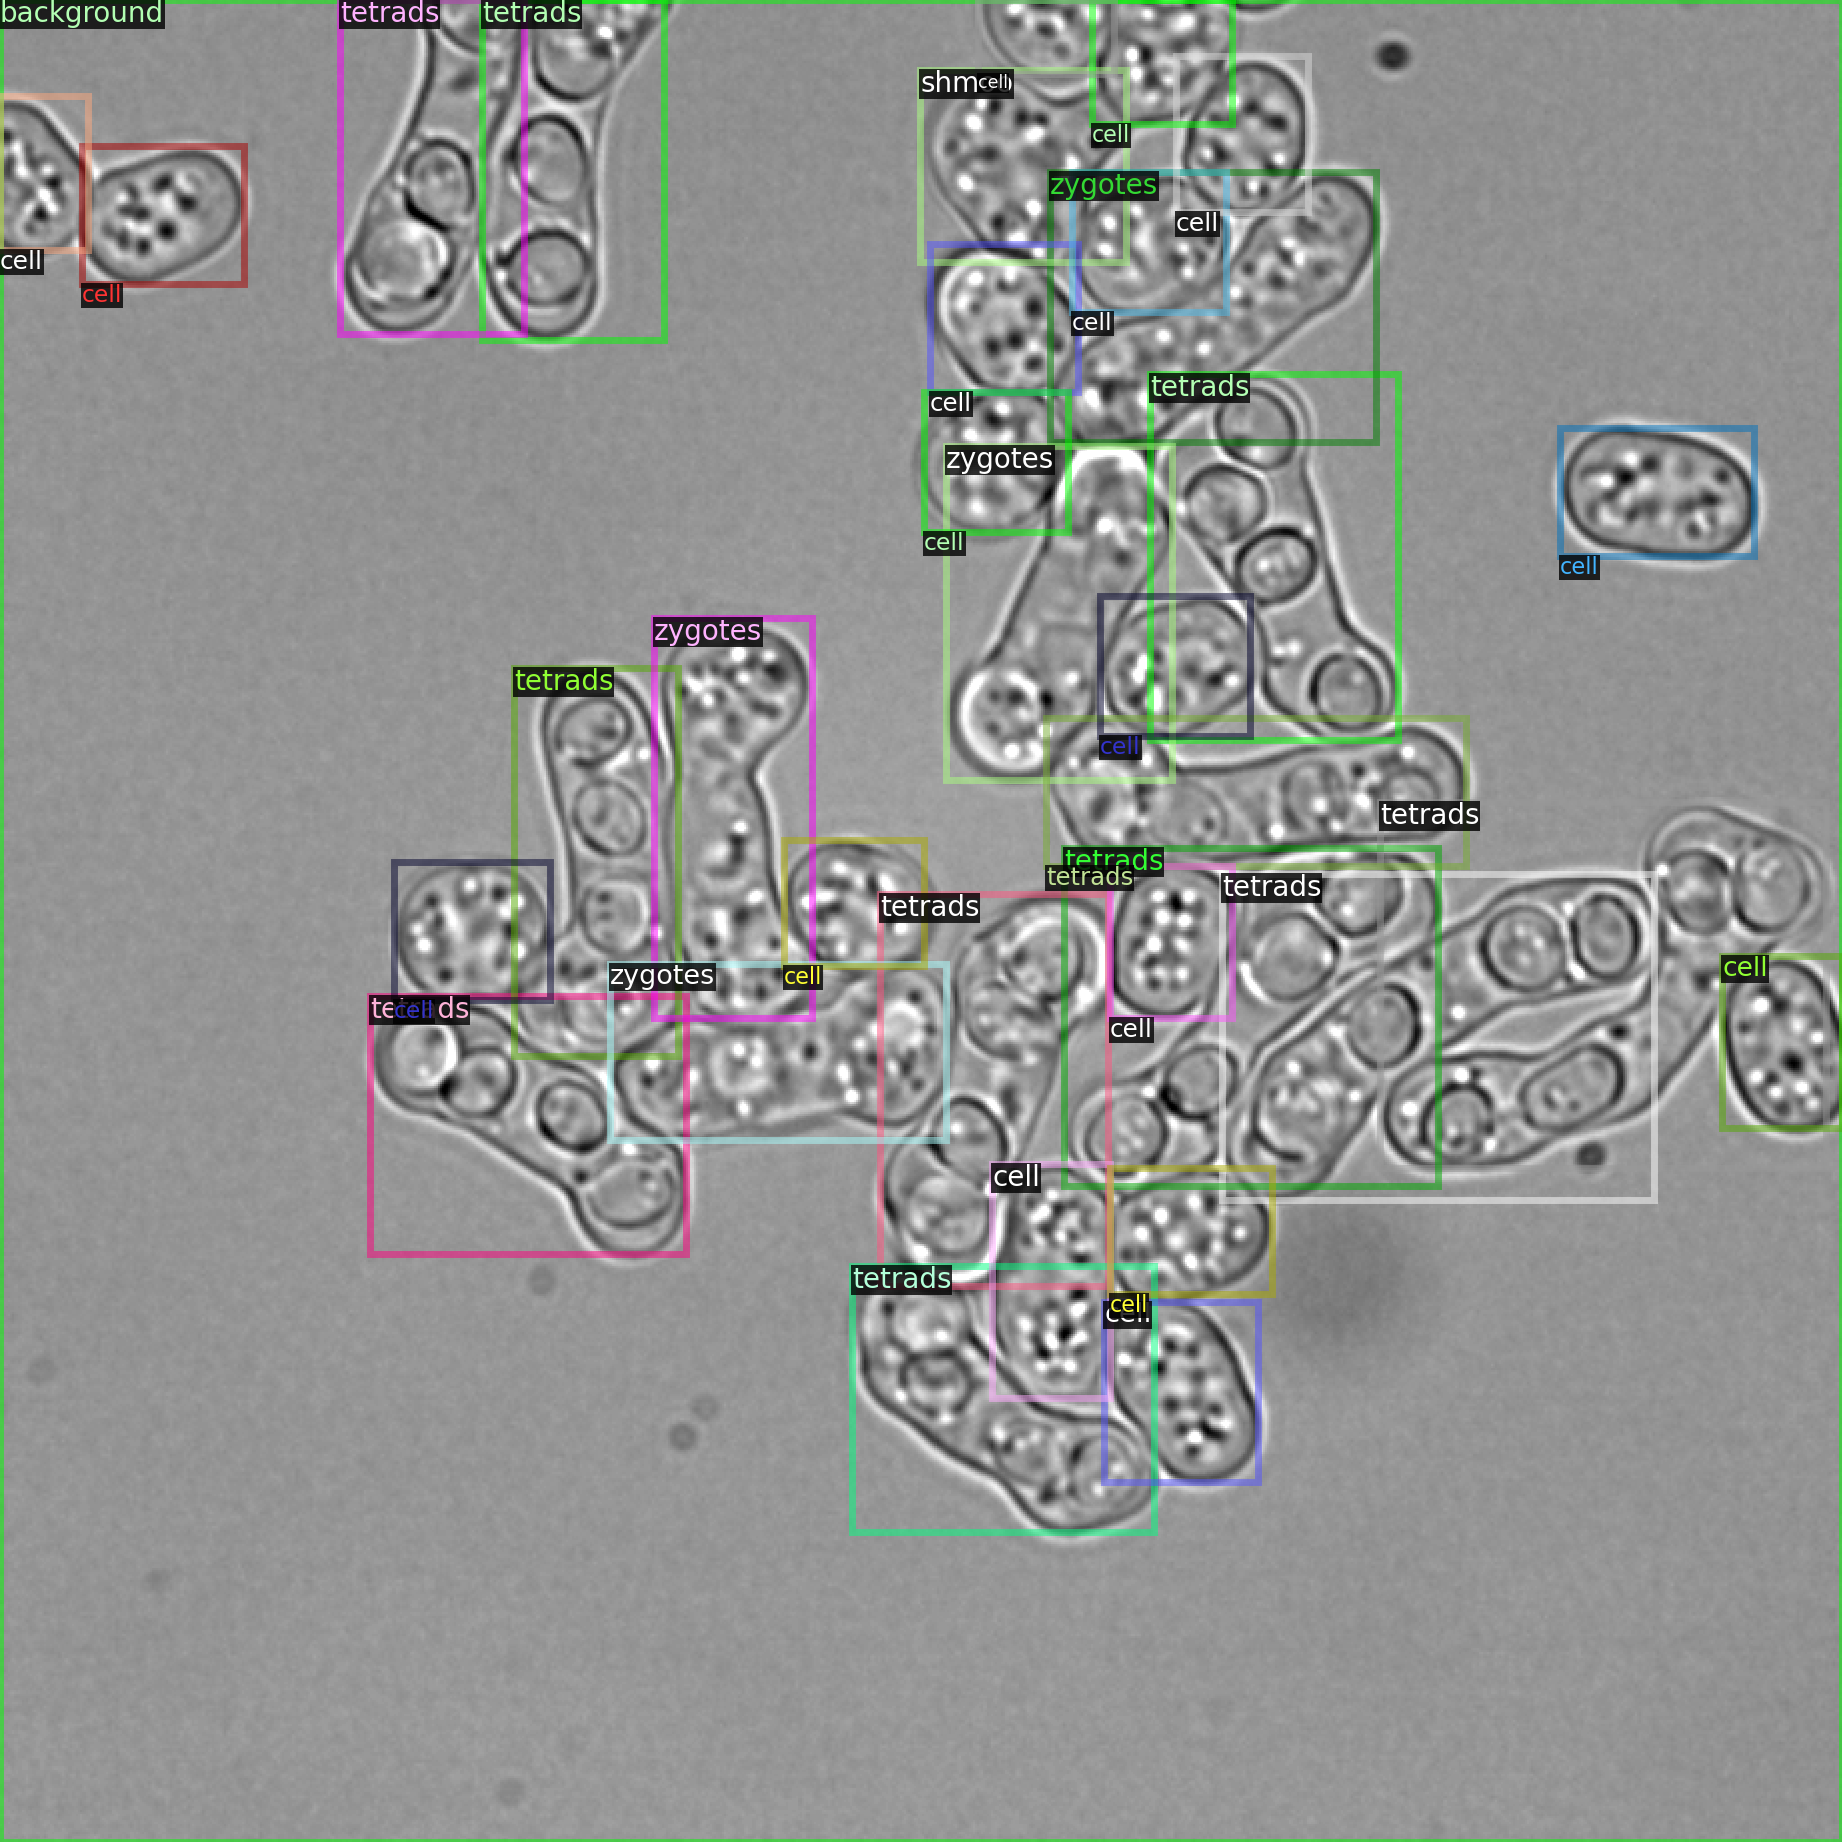

(921, 921, 3)


In [64]:
per_image = first_batch[np.random.randint(0, 32)]
img = per_image['image'].numpy().transpose(1, 2, 0)  # Convert to HWC
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
visualizer = Visualizer(img, metadata=metadata, scale=2)  # Add metadata if available
vis = visualizer.draw_dataset_dict({"annotations": per_image["segments_info"]})
cv2_imshow(vis.get_image()[:, :, ::-1])
print(img.shape)

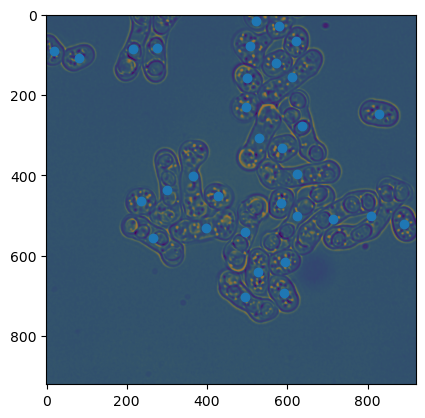

In [65]:
plt.imshow(per_image["sem_seg_weights"])
plt.imshow(per_image["image"][0], alpha=0.5)
points = np.array(per_image["center_points"])
plt.scatter(points[:,1],points[:,0])

In [49]:
print("keys: ", np.unique(per_image["sem_seg"]))
print("shape: ", per_image["sem_seg"].shape)

keys:  [0 1 2 7]
shape:  torch.Size([1587, 1587])


In [45]:
per_image.keys()

dict_keys(['file_name', 'image_id', 'sem_seg_file_name', 'width', 'height', 'segments_info', 'image', 'sem_seg', 'center', 'center_points', 'offset', 'sem_seg_weights', 'center_weights', 'offset_weights'])

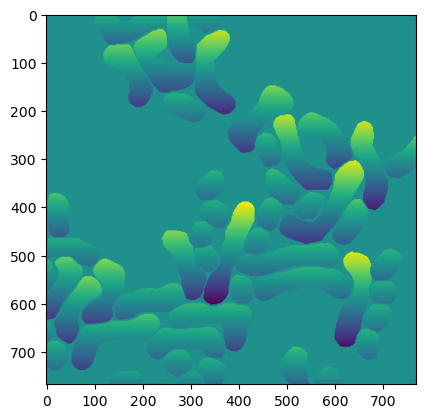

In [46]:
plt.imshow(per_image["offset"][0])

In [14]:
from panoptic_deeplab.post_processing import find_instance_center, group_pixels

AssertionError: An object named 'PanopticDeepLab' was already registered in 'META_ARCH' registry!

In [20]:
center_heatmap = per_image["center"].reshape(1, 320,320)
offsets = per_image["offset"]
threshold = 0.5
nms_kernel = 3
top_k = None

In [21]:
center_points = find_instance_center(
    center_heatmap, threshold=threshold, nms_kernel=nms_kernel, top_k=top_k
)
ins_seg = group_pixels(center_points, offsets)

/home/liwa/miniconda3/envs/oneformer/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [22]:
foreground_mask = offsets[0]!=0

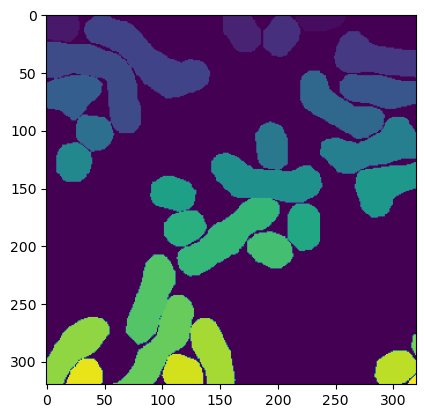

In [26]:
plt.imshow(ins_seg[0]*foreground_mask)

In [24]:
np.unique(ins_seg[0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [45]:
MetadataCatalog.get("yeastcity_train")

namespace(name='yeastcity_train',
          panoptic_root='/home/liwa/data/datasets/yeastcity/gtFine/yeastcity_panoptic_train',
          image_root='/home/liwa/data/datasets/yeastcity/leftImg8bit/train',
          panoptic_json='/home/liwa/data/datasets/yeastcity/gtFine/yeastcity_panoptic_train.json',
          gt_dir='/home/liwa/data/datasets/yeastcity/gtFine/train',
          evaluator_type='yeastcity_panoptic_seg',
          ignore_label=255,
          label_divisor=1000,
          thing_classes=['background',
                         'cell',
                         'shmoo',
                         'zygotes',
                         'tetrads',
                         'lysis',
                         'spore',
                         'cell_mt',
                         'shmoo_mt',
                         'fusion_mt',
                         'tetrads_mt',
                         'paired',
                         'unknown'],
          thing_colors=[[0, 0, 0],
                